In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
aapl = pd.read_csv('./AAPL.csv', parse_dates=['Date'], index_col=0)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


In [4]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10567 entries, 1980-12-12 to 2022-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10567 non-null  float64
 1   High       10567 non-null  float64
 2   Low        10567 non-null  float64
 3   Close      10567 non-null  float64
 4   Adj Close  10567 non-null  float64
 5   Volume     10567 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 577.9 KB


In [5]:
iff = pd.read_csv('./IFF.csv', parse_dates=['Date'], index_col=0)
iff.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1974-12-17,0.0,7.375000,6.625000,7.250000,1.967924,310800
1974-12-18,0.0,7.750000,7.500000,7.541667,2.047093,95400
1974-12-19,0.0,8.083333,7.416667,7.916667,2.148883,143100
1974-12-20,0.0,7.958333,7.708333,7.708333,2.092331,75300
1974-12-23,0.0,8.000000,7.583333,8.000000,2.171500,112800


In [6]:
iff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12080 entries, 1974-12-17 to 2022-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       12080 non-null  float64
 1   High       12080 non-null  float64
 2   Low        12080 non-null  float64
 3   Close      12080 non-null  float64
 4   Adj Close  12080 non-null  float64
 5   Volume     12080 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 660.6 KB


In [7]:
spx = pd.read_csv('./SPX.csv', parse_dates=['Date'], index_col='Date')
spx.sort_index(ascending=True, inplace=True)
spx.rename(columns={'Close/Last':'Close'}, inplace=True)
spx.head()

,Close,Volume,Open,High,Low
Date,,,,,
2012-11-09,1379.85,--,1377.55,1391.39,1373.03
2012-11-12,1380.03,--,1379.86,1384.87,1377.19
2012-11-13,1374.53,--,1380.03,1388.81,1371.39
2012-11-14,1355.49,--,1374.64,1380.13,1352.50
2012-11-15,1353.33,--,1355.41,1360.62,1348.05


In [8]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2546 entries, 2012-11-09 to 2022-11-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2546 non-null   float64
 1   Volume  2546 non-null   object 
 2   Open    2546 non-null   float64
 3   High    2546 non-null   float64
 4   Low     2546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 119.3+ KB


<AxesSubplot:xlabel='Date'>

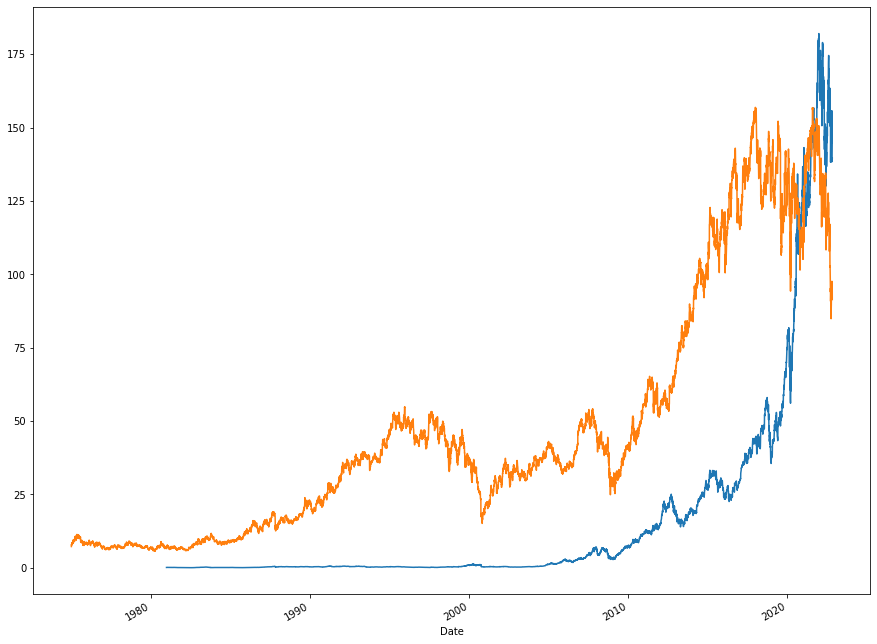

In [9]:
plt.figure(figsize=(15, 12))
aapl.Close.plot()
iff.Close.plot()

# Random Walk I

In [13]:
from numpy.random import normal, seed, choice
from scipy.stats import norm
seed(42)

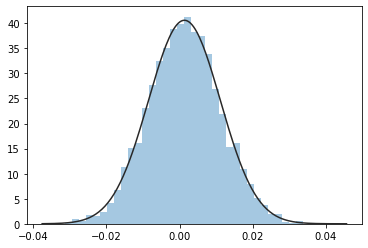

In [52]:
# Create Random Numbers
random_returns = normal(loc=0.001, scale=0.01, size=2500)
sns.distplot(random_returns, fit=norm, kde=False)
plt.show()

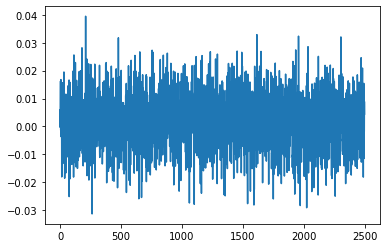

In [53]:
plt.plot(random_returns)

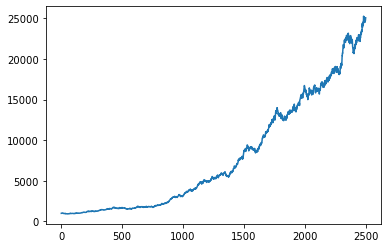

In [55]:
random_returns = pd.Series(random_returns)
random_prices = random_returns.add(1).cumprod()
random_prices.mul(1000).plot()
plt.show()

### PCT_CHANGE vs. Manual

In [33]:
df_spx = spx['Close'].to_frame()
df_spx.head()

,Close
Date,
2012-11-09,1379.85
2012-11-12,1380.03
2012-11-13,1374.53
2012-11-14,1355.49
2012-11-15,1353.33


In [60]:
df_spx['pct_change'] = df_spx.Close.pct_change()
df_spx['shifted'] = df_spx.Close.shift()
df_spx['diff'] = df_spx['Close'].div(df_spx.shifted)
df_spx['ret'] = df_spx['diff'].sub(1)
df_spx.head()

,Close,pct_change,shifted,diff,ret
Date,,,,,
2012-11-09,1379.85,NaN,NaN,NaN,NaN
2012-11-12,1380.03,0.000130,1379.85,1.000130,0.000130
2012-11-13,1374.53,-0.003985,1380.03,0.996015,-0.003985
2012-11-14,1355.49,-0.013852,1374.53,0.986148,-0.013852
2012-11-15,1353.33,-0.001594,1355.49,0.998406,-0.001594


## Random Walk II
random walk of returns by sampling from actual returns

In [34]:
df_spx.head()

,Close
Date,
2012-11-09,1379.85
2012-11-12,1380.03
2012-11-13,1374.53
2012-11-14,1355.49
2012-11-15,1353.33


In [37]:
spx_returns = df_spx.Close.pct_change().dropna()
n_obs = spx_returns.count()
random_walk = choice(spx_returns, size=n_obs)
random_walk = pd.Series(random_walk, index=spx_returns.index)
random_walk.head()


Date
2012-11-12   -0.012172
2012-11-13   -0.006732
2012-11-14    0.013424
2012-11-15    0.003612
2012-11-16   -0.006343
dtype: float64

In [39]:
first = df_spx.Close.first('D')
spx_random = first.append(random_walk.add(1))
df_spx['spx_random'] = spx_random.cumprod()
df_spx.head()

,Close,spx_random
Date,,
2012-11-09,1379.85,1379.850000
2012-11-12,1380.03,1363.054498
2012-11-13,1374.53,1353.878491
2012-11-14,1355.49,1372.053226
2012-11-15,1353.33,1377.009028


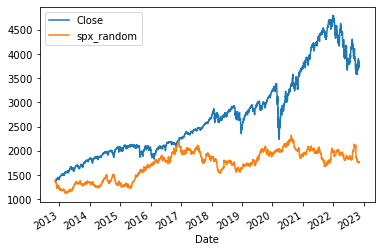

In [41]:
df_spx.plot()
plt.show()

## Relationships between time series: Correlation
Correlation coefficient: how similar is the pairwise movement of two variables around their averages

In [42]:
aapl.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,-0.047823,-0.051945,-0.052171,-0.052171,-0.052176,-0.625006
1980-12-16,-0.073063,-0.073063,-0.073398,-0.073398,-0.073397,-0.398879
1980-12-17,0.019703,0.024629,0.024751,0.024751,0.024751,-0.182415
1980-12-18,0.028992,0.028853,0.028992,0.028992,0.028992,-0.150298
...,...,...,...,...,...,...
2022-11-02,-0.039528,-0.021100,-0.027694,-0.037305,-0.037305,0.164536
2022-11-03,-0.046257,-0.061576,-0.043103,-0.042405,-0.042405,0.046086
2022-11-04,0.000211,-0.000910,-0.031495,-0.003600,-0.001947,0.437080


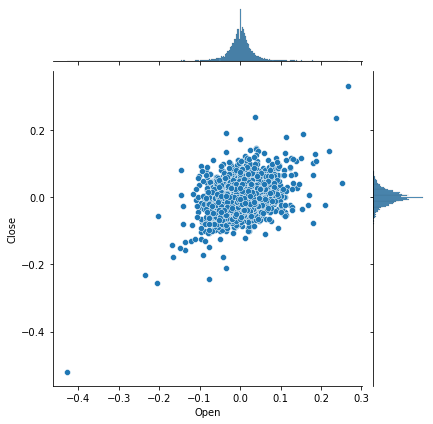

In [44]:
sns.jointplot(x='Open', y='Close', data=aapl.pct_change())

In [46]:
aapl.pct_change().corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.695759,0.713103,0.326200,0.326028,-0.015898
High,0.695759,1.000000,0.712283,0.726251,0.726087,0.078248
Low,0.713103,0.712283,1.000000,0.693690,0.693555,-0.071209
Close,0.326200,0.726251,0.693690,1.000000,0.999944,0.020323
Adj Close,0.326028,0.726087,0.693555,0.999944,1.000000,0.020293
Volume,-0.015898,0.078248,-0.071209,0.020323,0.020293,1.000000


<AxesSubplot:>

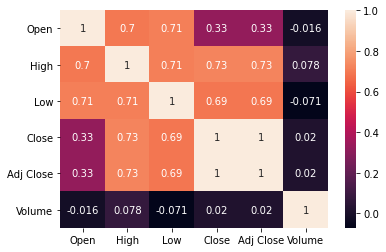

In [51]:
sns.heatmap(aapl.pct_change().corr(), annot=True)

## Annual return correlations

In [89]:
df_aapl = aapl.loc['2005':]['Close'].to_frame()
df_aapl

,Close
Date,
2005-01-03,1.130179
2005-01-04,1.141786
2005-01-05,1.151786
2005-01-06,1.152679
2005-01-07,1.236607
...,...
2022-11-02,145.029999
2022-11-03,138.880005
2022-11-04,138.380005


In [94]:
data = pd.concat([aapl.Close, iff.Close, spx.Close], axis=1).dropna()
data.columns = ['AAPL', 'IFF', 'SPX']

In [95]:
data

,AAPL,IFF,SPX
Date,,,
2012-11-09,19.537857,62.590000,1379.85
2012-11-12,19.386786,62.619999,1380.03
2012-11-13,19.389286,62.160000,1374.53
2012-11-14,19.174286,61.630001,1355.49
2012-11-15,18.772142,61.759998,1353.33
...,...,...,...
2022-11-02,145.029999,94.260002,3759.69
2022-11-03,138.880005,93.279999,3719.89
2022-11-04,138.380005,94.830002,3770.55


<AxesSubplot:>

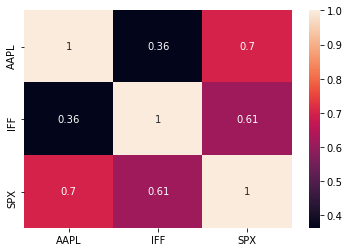

In [98]:
returns = data.pct_change()
sns.heatmap(returns.corr(), annot=True)